<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title"></span> The following notes written by  <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Sergio Gutiérrez Rodrigo (<sergut@unizar.es>) </span>. Distributed under  <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">License Creative Commons Atribución-NoComercial-CompartirIgual 4.0 Internacional</a>



```
Departamento de Física Aplicada
Universidad de Zaragoza
Instituto de Nanociencia y Materiales de Aragón (INMA)
C/ Pedro Cerbuna, 12, 50009, Zaragoza, España
```






**Contributors:**
+ Several functions extrated from https://github.com/Loracio/ultrashort-pulses-retrieval-using-AI
+ ... <...@unizar.es>.

---
# **Óptica - Tema 1**

---

# Young's experiment

# Intensity at the observation plane...hacer integral numérica (transformada de Fourier)

Intensidad franjas de Young para espectro simétrico:

$$I=I_1+I_2+2\sqrt{I_1 I_2}\gamma_c(\tau_s+\tau) \cos(\delta)$$ donde $\delta=\omega_0(\tau_s+\tau)$

Siendo $$\gamma_c(\tau) = \int_{-\infty}^{+\infty}g(x)cos(2\pi \, x \, \tau)\,dx$$ donde $x=\nu -\nu_0$

## $g(\nu)\rightarrow$ Tipo "perfil cuadrado" (simétrico)

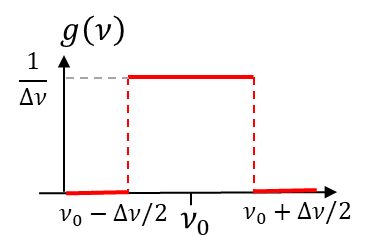

$\gamma(\tau)=e^{\imath 2 \pi \nu_0 \tau} \dfrac{\sin{(\pi \Delta \nu \, \tau)}}{\pi \Delta \nu \, \tau}$

$\implies \gamma_c(\tau)=\dfrac{\sin{(\pi \Delta \nu \, \tau)}}{\pi \Delta \nu \, \tau}$

In [ ]:
import numpy as np

def intensidad_young(xp,I1,I2,lambda_nm,n,d,D1,D2,xs,gamma_tipo='onda plana'):
  lambda0=lambda_nm*1e-9
  delta= 2.0*np.pi*n/lambda0*(xs*d/D1+xp*d/D2)
  k = 2.0 * np.pi / lambda0
  omega0=c*k

  if(gamma_tipo=='onda plana'):
    gamma_c=1.0

  if(gamma_tipo=='perfil cuadrado'):
    tau=delta/omega0
    delta_nu = 5.0e-1*omega0/(2.0*np.pi)
    gamma_c= np.sinc(np.pi*delta_nu*tau)

  cos_delta=np.cos(delta)
  return I1+I2+2*np.sqrt(I1*I2)*gamma_c*cos_delta

# Parameters (geometry)

+ $D_1$   (distancia entre el plano de la fuente en $S$ y el plano que contiene a las aperturas)
+ $D_2$  (distancia entre el plano que contiene a las aperturas y la "pantalla" de observación)
+ $d$  (distancia entre las aperturas)
+ $x_s$  (coordenada de la fuente en el eje $x$ )
+ λ (longitud de onda)

In [ ]:
I1,I2=1.0,1.0
n=1.0
'''
Metros
'''
D1=3.0
D2=3.0
d=0.001
xs=0.0

c=299792458.0 #m/s
lambda_nm = 600.0 # nm
lambda0=lambda_nm*1e-9
k = 2.0 * np.pi / lambda0
omega0=c*k

# Young's experiment $x$ direction

In [ ]:
def calc_intensity_pattern():
    Xp=400
    m=5
    xpm = (2*m+1)*lambda0*D2/(2.0*d)-xs*D2/D1
    ypm = xpm
    diff_pattern = []
    for i in range(Xp):
      print("iteration",i,' of ',Xp)
      xp=xpm * (Xp - 2 * i) / Xp
      yp=1.0e-9
      I_analytic=intensidad_young(xp,I1,I2,lambda_nm,n,d,D1,D2,xs,
                                  gamma_tipo='perfil cuadrado')
      diff_pattern.append([xp,I_analytic])
    return np.array(diff_pattern)

In [ ]:
intensity_pattern=calc_intensity_pattern()

iteration 0  of  400
iteration 1  of  400
iteration 2  of  400
iteration 3  of  400
iteration 4  of  400
iteration 5  of  400
iteration 6  of  400
iteration 7  of  400
iteration 8  of  400
iteration 9  of  400
iteration 10  of  400
iteration 11  of  400
iteration 12  of  400
iteration 13  of  400
iteration 14  of  400
iteration 15  of  400
iteration 16  of  400
iteration 17  of  400
iteration 18  of  400
iteration 19  of  400
iteration 20  of  400
iteration 21  of  400
iteration 22  of  400
iteration 23  of  400
iteration 24  of  400
iteration 25  of  400
iteration 26  of  400
iteration 27  of  400
iteration 28  of  400
iteration 29  of  400
iteration 30  of  400
iteration 31  of  400
iteration 32  of  400
iteration 33  of  400
iteration 34  of  400
iteration 35  of  400
iteration 36  of  400
iteration 37  of  400
iteration 38  of  400
iteration 39  of  400
iteration 40  of  400
iteration 41  of  400
iteration 42  of  400
iteration 43  of  400
iteration 44  of  400
iteration 45  of  40

## Plot static figure (both analytic and numerical)

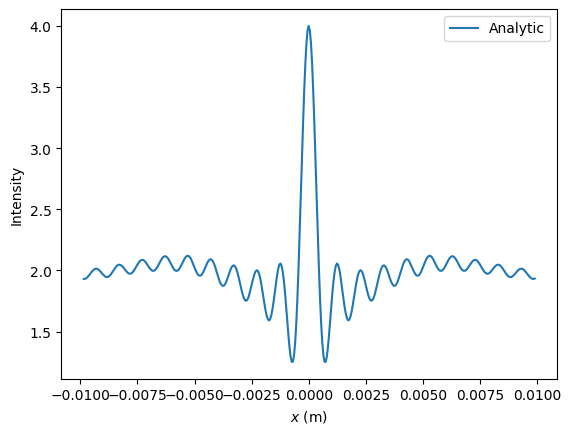

In [ ]:
import matplotlib.pyplot as plt
m=5
xpm = (2*m+1*lambda0*D2)/(2.0*d)-xs*D2/D1
x=intensity_pattern[:,0]
y_analytic=intensity_pattern[:,1]
plt.plot(x,y_analytic,label='Analytic')

plt.xlabel(r'$x$ (m)')
plt.ylabel('Intensity')
plt.legend()
plt.show()

## Plot dynamic figure (analytic)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import interactive
from ipywidgets import SelectionSlider

def plot_function_with_sliders(f, labels, x_min, y_min,ref_x,max_y,value_scale):
    # Extract the parameter names from the function signature, excluding 'x'
    # and the last
    parameters = list(f.__code__.co_varnames)[1:f.__code__.co_argcount-1]

    # Create sliders for each parameter
    # Define the base, min exponent, and max exponent for the slider
    sliders = {}
    i=0
    for param in parameters:
        print("parameter=",param)
        print("[initial value, min, max, step]=",value_scale[i])
        sliders[param] = widgets.FloatSlider(value=value_scale[i][0],
                                             min=value_scale[i][1],
                                             max=value_scale[i][2],
                                             step=value_scale[i][3],
                                             description=param,
                                             readout_format='.3f')
        i+=1
    # Create sliders for x_max and y_max
    print("r max")
    print("[initial value, min, max, step]=",value_scale[i])
    x_max_slider = widgets.FloatSlider(value=value_scale[i][0],
                                       min=value_scale[i][1],
                                       max=value_scale[i][2],
                                       step=value_scale[i][3],
                                       description='radial scale',
                                       readout_format='.3f')
    i+=1
    print("I max")
    print("[initial value, min, max, step]=",value_scale[i])
    y_max_slider = widgets.FloatSlider(value=value_scale[i][0],
                                       min=value_scale[i][1],
                                       max=value_scale[i][2],
                                       step=value_scale[i][3],
                                       description='I scale',
                                       readout_format='.3f')

    # Define a function to update the plot
    def update_plot(**kwargs):
        plt.figure(figsize=(8, 6))
        plt.xlabel(labels[0])
        plt.ylabel(labels[1])

        x = np.linspace(x_min-x_max_slider.value, abs(x_min)+x_max_slider.value, 200)

        # Pass slider values as keyword arguments to the input function
        params = {param: slider.value for param, slider in sliders.items()}
        params['gamma_tipo'] = value_scale[-1][0]
        y = f(x, **params)

        plt.plot(x/ref_x, y/max_y)
        plt.scatter(x/ref_x, y/max_y,color='red')
        plt.title("Intensity")
        plt.grid(True)
        plt.xlim((x_min-x_max_slider.value)/ref_x, (abs(x_min)+x_max_slider.value)/ref_x)
        plt.ylim(y_min, y_max_slider.value)
        plt.show()

    # Create an interactive plot with the sliders
    interactive_plot = interactive(update_plot, **sliders, x_max=x_max_slider, y_max=y_max_slider)
    return interactive_plot

In [ ]:
# Example of an input function
function=intensidad_young


# Define labels, axis limits, and initial parameter values
labels = [r'$x/\Delta x$', "Intensity"]
m=5
xpm = (2*m+1)*lambda0*D2/(2.0*d)-xs*D2/D1
x_min = -xpm
y_min = 0.0
max_y = 1.0
ref_x = lambda0*D2/d
# value_scale (each): [initial value, min,max,step]
value_scale=[[I1,0.1*I1,10*I1,0.05*I1], # I1
             [I2,0.1*I2,10*I2,0.05*I2], # I2
             [lambda_nm,0.1*lambda_nm,3.0*lambda_nm,0.1*lambda_nm],      # lambda (wavelength) in nm
             [n,1.0,3.5,0.1],           # n
             [d,0.1*d,10*d,0.05*d],     # d
             [D1,0.1*D1,10*D1,0.05*D1], # D1
             [D2,0.1*D2,10*D2,0.05*D2], # D2
             [xs,0.0,1e-2,1e-3],        # xs
             [-xpm,0.1*xpm,10*xpm,0.05*xpm],    # x scale
             [6.0,0.01,6.0,0.05],               # y scale
             ['perfil cuadrado']]       # tipo gamma

# Create the interactive plot
interactive_plot = plot_function_with_sliders(function,
                                              labels,
                                              x_min, y_min,
                                              ref_x,max_y,
                                              value_scale)

# Display the interactive plot
interactive_plot

parameter= I1
[initial value, min, max, step]= [1.0, 0.1, 10.0, 0.05]
parameter= I2
[initial value, min, max, step]= [1.0, 0.1, 10.0, 0.05]
parameter= lambda_nm
[initial value, min, max, step]= [600.0, 60.0, 1800.0, 60.0]
parameter= n
[initial value, min, max, step]= [1.0, 1.0, 3.5, 0.1]
parameter= d
[initial value, min, max, step]= [0.001, 0.0001, 0.01, 5e-05]
parameter= D1
[initial value, min, max, step]= [3.0, 0.30000000000000004, 30.0, 0.15000000000000002]
parameter= D2
[initial value, min, max, step]= [3.0, 0.30000000000000004, 30.0, 0.15000000000000002]
parameter= xs
[initial value, min, max, step]= [0.0, 0.0, 0.01, 0.001]
r max
[initial value, min, max, step]= [-0.0099, 0.0009900000000000002, 0.099, 0.0004950000000000001]
I max
[initial value, min, max, step]= [6.0, 0.01, 6.0, 0.05]


interactive(children=(FloatSlider(value=1.0, description='I1', max=10.0, min=0.1, readout_format='.3f', step=0…

# 2D diffraction pattern (analytic)

In [ ]:
def calc_intensity_pattern_2D():
    Xp,Yp=400,400
    m=5
    xpm = (2*m+1)*lambda0*D2/(2.0*d)-xs*D2/D1
    ypm = xpm
    diff_pattern = []
    for i in range(Xp):
      print("iteration",i,' of ',Xp)
      xp=xpm * (Xp - 2 * i) / Xp
      for j in range(Yp):
        yp=ypm * (Yp - 2 * j) / Yp
        I_analytic=intensidad_young(xp,I1,I2,lambda_nm,n,d,D1,D2,xs,
                                  gamma_tipo='perfil cuadrado')
        diff_pattern.append([xp,yp,I_analytic])
    return np.array(diff_pattern)

In [ ]:
intensity_pattern_2D=calc_intensity_pattern_2D()

iteration 0  of  400
iteration 1  of  400
iteration 2  of  400
iteration 3  of  400
iteration 4  of  400
iteration 5  of  400
iteration 6  of  400
iteration 7  of  400
iteration 8  of  400
iteration 9  of  400
iteration 10  of  400
iteration 11  of  400
iteration 12  of  400
iteration 13  of  400
iteration 14  of  400
iteration 15  of  400
iteration 16  of  400
iteration 17  of  400
iteration 18  of  400
iteration 19  of  400
iteration 20  of  400
iteration 21  of  400
iteration 22  of  400
iteration 23  of  400
iteration 24  of  400
iteration 25  of  400
iteration 26  of  400
iteration 27  of  400
iteration 28  of  400
iteration 29  of  400
iteration 30  of  400
iteration 31  of  400
iteration 32  of  400
iteration 33  of  400
iteration 34  of  400
iteration 35  of  400
iteration 36  of  400
iteration 37  of  400
iteration 38  of  400
iteration 39  of  400
iteration 40  of  400
iteration 41  of  400
iteration 42  of  400
iteration 43  of  400
iteration 44  of  400
iteration 45  of  40

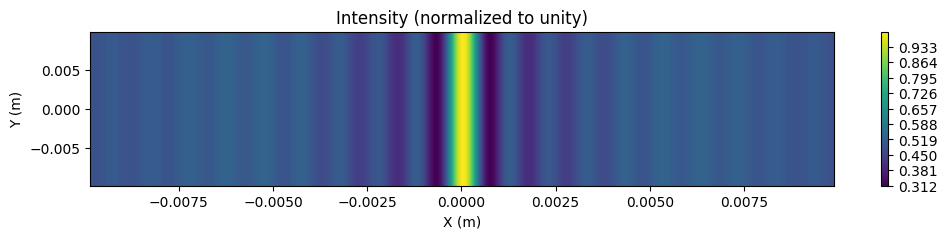

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data (replace this with your numpy array)
data =intensity_pattern_2D

# Extract x, y, and the value from the data
x = data[:, 0]
y = data[:, 1]
value = data[:, 2]/np.max(data[:, 2])

# Reshape the value to a 2D grid for contour plotting
x_unique = np.unique(x)
y_unique = np.unique(y)
X, Y = np.meshgrid(x_unique, y_unique)
Z = value.reshape(len(y_unique), len(x_unique))


# Create a contour plot
plt.figure(figsize=(12, 2))
max_value=np.max(Z)/1.0
contour = plt.contourf(X, Y,  np.rot90(Z), levels=500, cmap='viridis',
                       vmax=max_value)
plt.colorbar(contour)  # Use scientific notation for colorbar


plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.title('Intensity (normalized to unity)')
plt.show()


# Definiciones transformada de Fourier

In [ ]:
import numpy as np

def DFT_naive(E, t, Δt, ω, Δω):
        """
        Utiliza la versión discretizada de la transformada de Fourier directa más básica:
            Ẽ(ωₙ) := Ẽₙ = ∑ⱼ₌₀ᴺ⁻¹ E(tⱼ) e^{-i ωₙ tⱼ} Δt

        Y devuelve el array de coeficientes. Notar que puede ser llamada con cualquier ω, Δω.
        """
        N = E.size
        result = np.zeros(N, dtype=complex)
        for i in range(N):
            for j in range(N):
                result[i] += E[j] * np.exp(-1j * ω[i] * t[j])
            result[i] *= Δt
        return result

def IDFT_naive(Ẽ, t, Δt, ω, Δω):
        """
        Utiliza la versión discretizada de la transformada de Fourier inversa más básica:
            E(tⱼ) := Eⱼ = 1/2π · ∑ₙ₌₀ᴺ⁻¹ Ẽ(ωₙ) e^{i tⱼ ωₙ} Δω

        Y devuelve el array de coeficientes. Notar que puede ser llamada con cualquier ω, Δω.
        """
        N = Ẽ.size
        result = np.zeros(N, dtype=complex)
        for i in range(N):
            for j in range(N):
                result[i] += Ẽ[j] * np.exp(1j * ω[i] * t[j])
            result[i] *= Δω/(2*np.pi)
        return result

def frecuencias_DFT(N, Δt):
    """
    Crea un array de N frecuencias desde -fₘ/2 hasta +fₘ/2, donde fₘ es la
    frecuencia de muestreo de la señal, dada por fₘ = 1 / Δt.

    Args:
        N (int): número de muestras temporales del vector de tiempos
        Δt (float): separación entre las muestras (inversa de la frecuencia de muestreo)

    Devuelve:
        np.ndarray: array con las frecuencias (1 / unidades de Δt)
    """
    return -1 / (2 * Δt) + np.arange(N) /(N * Δt)

# Definiciones relacionadas con un pulso Gaussiano

In [ ]:
import numpy as np

def pulso_gaussiano(t, t0, A, τ, ω_0, φ):
    """
    Genera un pulso gaussiano dada su duración, frecuencia central y fase.
    Las unidades han de ser consistentes entre t, t0, τ y ω_0.
    El pulso está normalizado.

    Un pulso gaussiano viene caracterizado por una envolvente en forma de gaussiana de expresión:

    E_envolvente = A * exp(-(t - t₀)² / 2*τ²)

    Donde t₀ es el instante temporal en el que la amplitud del pulso es máxima, y τ es la duración
    temporal del pulso, que está relacionada con el ancho de banda por la expresión:

    FWHM = 2 * √log(2) * τ

    FHWM es la anchura a media altura (full width half maximum).

    La envolvente viene modulada por un término exponencial complejo que depende de la frecuencia central de la onda,
    de manera que el pulso vendrá dado por el producto de la envolvente y esta exponencial, además del producto
    con la exponencial compleja que lleva la fase de la envolvente de la onda portadora.

    E(t) = E_envolvente * exp(i * ω_0 * t) * exp(i * φ(t)) = A * exp(-(t - t₀)² / 2*τ) * exp(i * ( ω_0 * t + φ(t) ) )

    Argumentos:
        t (np.array[float]): vector de tiempos
        t0 (float): tiempo en el que la amplitud del pulso es máxima
        A (float): amplitud del pulso
        τ (float): anchura del pulso
        ω_0 (float): frecuencia de la moduladora del pulso gaussiano (radianes / unidad de tiempo)
        φ (np.array[float]): fase de la envolvente de la onda portadora (rad)

    Devuelve:
        E_pulso (float): forma del pulso gaussiano en el tiempo especificado
    """

    return A * np.exp(-(t-t0)*(t-t0) / (2 * τ * τ)) * np.exp(1j * ( ω_0 * t + φ ))



def transformada_pulso_gaussiano(ω, t0, A, τ, ω_0, φ):
    """
    Calcula la transformada de Fourier analítica de un pulso gaussiano con una onda moduladora y fase constante.

    El pulso viene dado por:
        E(t) = A * exp(-(t - t₀)² / 2*τ²) * exp(i * ( ω_0 * t + φ) )

    Su transformada de Fourier será:
        Ẽ(ω) = A  * sqrt(2π * τ²) * exp(i * (t₀ * (ω₀ - ω) +  φ)) * exp(-(ω - ω₀)²  / (2 * τ²))

    Las unidades han de ser consistentes entre ω, t0, τ y ω_0.

    Args:
        ω (np.array[float]): array de frecuencias en los que evaluar la transformada
        t0 (float): tiempo en el que la amplitud del pulso es máxima
        A (float): Amplitud del pulso
        τ (float): anchura del pulso
        ω_0 (float): frecuencia de la onda moduladora del pulso gaussiano (radianes / unidad de tiempo)
        φ (np.array[float]): fase de la envolvente de la onda portadora (rad) [cte]

    Devuelve:
        np.array: array de los valores de la transformada de Fourier en las frecuencias dadas
    """

    return A * τ * np.sqrt(2 * np.pi) * np.exp(1j * (φ + t0 * (ω_0 - ω)) - (ω - ω_0)*(ω - ω_0) / (2 * τ * τ))


def media(x, y):
    """
    Calcula la media de la distribución dada por (x, f(x) = y)

    Args:
        x (np.array): valores en el eje X
        y (np.array): valores en el eje Y

    Devuelve:
        (float): media de la distribución
    """
    return np.sum(x * y) / np.sum(y)

def desviacion_estandar(x, y):
    """
    Calcula la desviacion estandar de la distribución dada por (x, f(x) = y)

    Args:
        x (np.array): valores en el eje X
        y (np.array): valores en el eje Y

    Devuelve:
        (float): desviacion estandar de la distribución
    """
    dx = x - media(x, y)
    return np.sqrt(np.sum(dx * dx * y) / np.sum(y))

def FWHM(señal, Δt):
    """
    Calcula la anchura a media altura (Full Width at Half Maximum) de una señal.

    Args:
        señal (np.array): señal sobre la que calcular su FWHM
        Δt (float): muestreo temporal

    Returns:
        FHWM (float): anchura a media altura de la señal
    """
    half_max = np.max(señal) / 2

    left_idx = np.argmax(señal >= half_max)
    right_idx = len(señal) - np.argmax(señal[::-1] >= half_max) - 1

    return (right_idx - left_idx) * Δt

In [ ]:
"""
A la hora de trabajar con pulsos electromagnéticos, hay varias magnitudes
relacionadas con tiempo/frecuencia que pueden ser empleadas.

Este módulo nos otorga funciones para convertir entre las siguientes unidades:

    - λ: longitud de onda [m]
    - ω: frecuencia angular [rad/s]
    - f: frecuencia [1/s]
    - k: vector de ondas [rad/m]

Para simplificar el uso del módulo, en vez de recordar los nombres de las 12 funciones
para pasar de una unidad a otra, utilizamos una única función a la que introducimos el
array a convertir y dos cadenas de carácteres que indican de qué unidad a qué unidad
queremos convertir. Un ejemplo de esto sería:

>>> convertir(x, 'λ', 'ω')

La implementación de esta función se basa en definir cada una de las 12 funciones de
conversión, y después guardar en un diccionario ('selector') cuándo debe ser usada cada
función dependiendo de la conversión deseada.
"""
import numpy as np
import scipy.constants as constants

def _longitudOnda_frecuenciaAngular(λ):
    return 2 * np.pi * constants.c / λ

def _longitudOnda_frecuencia(λ):
    return constants.c / λ

def _longitudOnda_vectorOndas(λ):
    return 2 * np.pi / λ

def _frecuenciaAngular_longitudOnda(ω):
    return 2 * np.pi * constants.c / ω

def _frecuenciaAngular_frecuencia(ω):
    return ω / (2 * np.pi)

def _frecuenciaAngular_vectorOndas(ω):
    return ω / constants.c

def _frecuencia_longitudOnda(f):
    return constants.c / f

def _frecuencia_frecuenciaAngular(f):
    return 2 * np.pi * f

def _frecuencia_vectorOndas(f):
    return 2*np.pi * f / constants.c

def _vectorOndas_longitudOnda(k):
    return 2 * np.pi / k

def _vectorOndas_frecuenciaAngular(k):
    return k * constants.c

def _vectorOndas_frecuencia(k):
    return k * constants.c / (2 * np.pi)

alias = {
    'λ': 'λ',
    'lambda': 'λ',
    'longitud onda': 'λ',
    'ω': 'ω',
    'omega' : 'ω',
    'frecuencia angular' : 'ω',
    'f': 'f',
    'frecuencia': 'f',
    'k': 'k',
    'vector ondas': 'k'
}

selector = {
    'λ' : {
        'λ': lambda x: copy(x),
        'ω': _longitudOnda_frecuenciaAngular,
        'f': _longitudOnda_frecuencia,
        'k': _longitudOnda_vectorOndas
    },

    'ω': {
        'λ': _frecuenciaAngular_longitudOnda,
        'ω': lambda x: copy(x),
        'f': _frecuenciaAngular_frecuencia,
        'k': _frecuenciaAngular_vectorOndas
    },

    'f': {
        'λ': _frecuencia_longitudOnda,
        'ω': _frecuencia_frecuenciaAngular,
        'f': lambda x: copy(x),
        'k': _frecuencia_vectorOndas
    },

    'k': {
        'λ': _vectorOndas_longitudOnda,
        'ω': _vectorOndas_frecuenciaAngular,
        'f': _vectorOndas_frecuencia,
        'k': lambda x: copy(x)
    },
}

def convertir(x: np.ndarray, unidades_entrada: str, unidades_salida: str):
    """
    Convierte un array dado en ciertas unidades (unidades_entrada) a otras
    unidades (unidades_salida). Pueden utilizarse los siguientes 'alias' para
    las distintas unidades:

        'λ', 'lambda', 'longitud onda' para la longitud de onda
        'ω', 'omega', 'frecuencia angular' para la frecuencia angular
        'f', 'frecuencia' para la frecuencia
        'k', 'vector ondas' para el vector de ondas

    Args:
        x (np.ndarray): array con los valores numéricos en la unidad de entrada
        unidades_entrada (string): unidad de los datos de entrada
        unidades_salida (string): unidad a la que se quieren convertir los datos

    Devuelve:
        (np.ndarray): array con los valores numéricos en la unidad a la que se quería convertir.
                      Siempre será una copia del array de entrada y nunca lo sobreescribirá.
    """

    return selector[alias[unidades_entrada]][alias[unidades_salida]](x)

Frecuencia de muestreo: 409.6 [THz]
Frecuencia de la señal: 193.41448903225807 [THz]
Se cumple el teorema de Nyquist
Δω=0.015339807878856415, relación reciprocidad = 0.6281651326391701


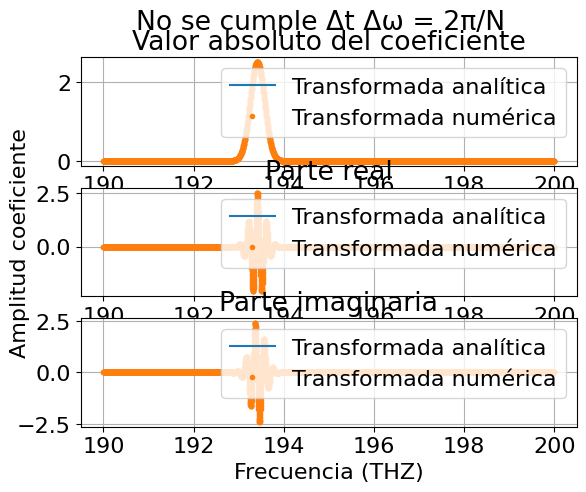

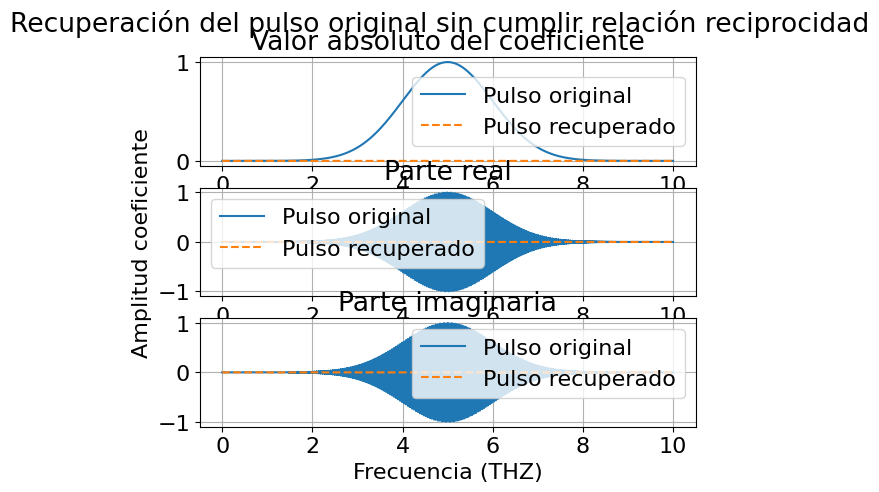

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as constants
#import path_helper # Para poder cargar el módulo de 'core' sin tener que cambiar el path


plt.rcParams.update({'font.size': 16}) # Tamaño de la fuente del plot


if __name__ == '__main__':

    # Parámetros de la medida
    numero_de_muestras = 4096
    duracion_temporal = 10 # Tiempo total de medida de la señal (ps)
    frecuencia_muestreo = numero_de_muestras / duracion_temporal # En THz

    t, Δt = np.linspace(0, duracion_temporal, num=numero_de_muestras, retstep=True) # Vector de tiempos. Guardamos la separación entre datos (inversa de la frecuencia de muestreo)
    # Construimos las frecuencias con la restricción del Tma Nyquist y la relación de reciprocidad.
    frecuencias = frecuencias_DFT(numero_de_muestras, Δt) # Nos lo devuelve en unidades de 1/ps (THz)
    ω = convertir(frecuencias, 'frecuencia', 'frecuencia angular') # Convertimos a rad / ps para utilizar la función DFT
    Δω = 2 * np.pi / (numero_de_muestras * Δt) # Relación de reciprocidad Δt Δω = 2π/N


    # -- Parámetros del pulso --
    t0 = 5 # # Tiempo en el que el pulso tiene su máximo (ps)
    A = 1 # Amplitud del pulso
    λ_0 = 1.55 # Longitud de onda de ejemplo (en micrómetros)
    ω_0 = 2 * np.pi * constants.c * 1e-12 / (λ_0 * 1e-6) # Frecuencia angular del pulso (rad / ps)
    φ_0 =  0 # Fase del pulso (constante en este caso)
    τ = 1 # Duración del pulso (ps)

    # Comprobamos que se cumple el teorema de muestreo de Nyquist para que los resultados sean correctos
    print(f"Frecuencia de muestreo: {frecuencia_muestreo} [THz]")
    print(f"Frecuencia de la señal: {convertir(ω_0, 'frecuencia angular', 'frecuencia')} [THz]")
    if frecuencia_muestreo/2 > convertir(ω_0, 'frecuencia angular', 'frecuencia'):
        print("Se cumple el teorema de Nyquist")
    else:
        print("¡Atención! No se cumple el teorema de muestreo de Nyquist")


    pulso = pulso_gaussiano(t, t0, A, τ, ω_0, φ_0) # Vector con el campo complejo del pulso



    """
    Vemos pues, que la fft de numpy al no estar multiplicada por los factores de fase, no reproduce bien los resultados.
    """

    """
    Por último, vamos a ver qué ocurre cuando NO satisfacemos la relación de reciprocidad. Como nos interesa ver la región del pico de
    frecuencias, vamos a centrarnos en la región de 190 THz hasta 200 THz, construyendo el array de frecuencias partiendo desde
    ω₀ = 2π * 190 hasta ωₘₐₓ = 2π * 200. De esta manera,  Δω = (ω_max - ω_min) / numero_de_muestras y será menor que el impuesto
    por la relación de reciprocidad.

    Definimos la función de DFT_naive que realiza la transformada con la forma más simplificada de la discretización de la integral
    de la transformada directa. Asimismo, definimos IDFT_naive como una función que realiza la transformada inversa con la discretización
    más simple posible.

    Al no cumplirse la relación de reciprocidad, no estaremos recuperando bien el pulso.
    """

    numero_de_muestras =  4096
    duracion_temporal = 10

    t, Δt = np.linspace(0, duracion_temporal, num=numero_de_muestras, retstep=True)
    pulso = pulso_gaussiano(t, t0, A, τ, ω_0, φ_0)

    ω_min = 2 * np.pi * 190
    ω_max = 2 * np.pi * 200
    Δω = (ω_max - ω_min) / numero_de_muestras
    print(f"Δω={Δω}, relación reciprocidad = {2 * np.pi / (numero_de_muestras * Δt)}")
    ω = ω_min + Δω * np.arange(numero_de_muestras)
    frecuencias = convertir(ω, 'frecuencia angular', 'frecuencia')

    transformada_numerica = DFT_naive(pulso, t, Δt, ω, Δω)
    transformada_analitica = transformada_pulso_gaussiano(ω, t0, A, τ, ω_0, φ_0)
    señal_recuperada = IDFT_naive(transformada_numerica, t, Δt, ω, Δω)


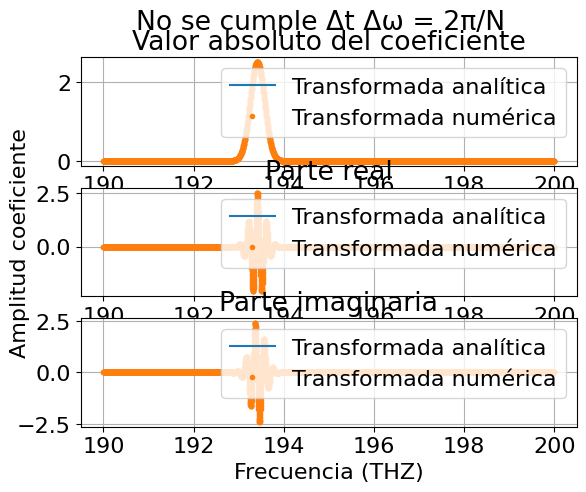

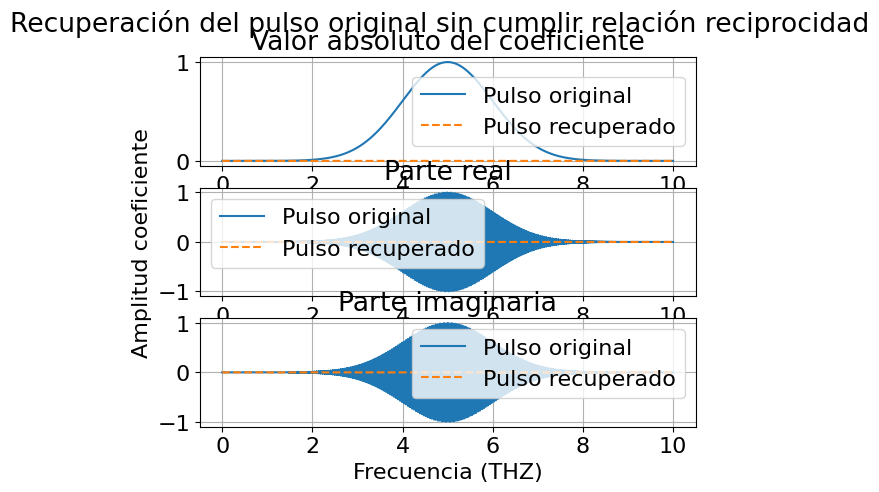

In [ ]:
    fig, ax = plt.subplots(3,1)

    fig.suptitle('No se cumple Δt Δω = 2π/N')

    ax[0].plot(frecuencias, np.abs(transformada_analitica), '-', label='Transformada analítica')
    ax[0].plot(frecuencias, np.abs(transformada_numerica), '.', label='Transformada numérica')
    ax[0].set_title('Valor absoluto del coeficiente')
    ax[0].grid()
    ax[0].legend()

    ax[1].plot(frecuencias, np.real(transformada_analitica), '-', label='Transformada analítica')
    ax[1].plot(frecuencias, np.real(transformada_numerica), '.', label='Transformada numérica')
    ax[1].set_title('Parte real')
    ax[1].grid()
    ax[1].legend()

    ax[2].plot(frecuencias, np.imag(transformada_analitica), '-', label='Transformada analítica')
    ax[2].plot(frecuencias, np.imag(transformada_numerica), '.', label='Transformada numérica')
    ax[2].set_title('Parte imaginaria')
    ax[2].grid()
    ax[2].legend()

    ax[2].set_xlabel('Frecuencia (THZ)')
    ax[1].set_ylabel('Amplitud coeficiente')



    fig, ax = plt.subplots(3,1)

    fig.suptitle('Recuperación del pulso original sin cumplir relación reciprocidad')

    ax[0].plot(t, np.abs(pulso), '-', label='Pulso original')
    ax[0].plot(t, np.abs(señal_recuperada), '--', label='Pulso recuperado')
    ax[0].set_title('Valor absoluto del coeficiente')
    ax[0].grid()
    ax[0].legend()

    ax[1].plot(t, np.real(pulso), '-', label='Pulso original')
    ax[1].plot(t, np.real(señal_recuperada), '--', label='Pulso recuperado')
    ax[1].set_title('Parte real')
    ax[1].grid()
    ax[1].legend()

    ax[2].plot(t, np.imag(pulso), '-', label='Pulso original')
    ax[2].plot(t, np.imag(señal_recuperada), '--', label='Pulso recuperado')
    ax[2].set_title('Parte imaginaria')
    ax[2].grid()
    ax[2].legend()

    ax[2].set_xlabel('Frecuencia (THZ)')
    ax[1].set_ylabel('Amplitud coeficiente')

    """
    Vemos que no se recupera bien el pulso al escoger esa pequeña ventana de frecuencias. Si
    escogemos las frecuencias con el espaciado correcto, cumpliendo la relación de reciprocidad
    y el teorema de muestreo, el resultado al recuperar la señal debería ser el correcto.
    """
    plt.show()